## LDA classification using iris dataset

In [1]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline




# Load the Iris dataset

In [2]:

iris = load_iris()
X = iris.data
y = iris.target



# Split data into training and testing sets


In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Standardize the features (optional but recommended)


In [4]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Create the LDA model


In [5]:

lda = LinearDiscriminantAnalysis(n_components=2)


# Train the LDA model on the training data


In [6]:

lda.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis(n_components=2)


# Project data onto the two LDA components

In [7]:

X_train_lda = lda.transform(X_train_scaled)
X_test_lda = lda.transform(X_test_scaled)



# Plot the LDA results


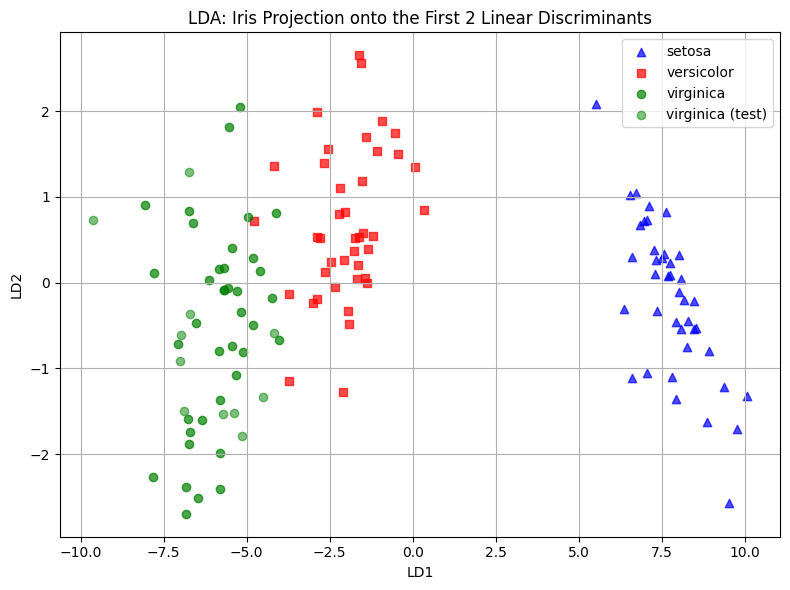

In [8]:

plt.figure(figsize=(8, 6))
for label, marker, color in zip(range(3), ("^", "s", "o"), ("blue", "red", "green")):
    plt.scatter(
        X_train_lda[:, 0][y_train == label],
        X_train_lda[:, 1][y_train == label],
        marker=marker,
        color=color,
        alpha=0.7,
        label=iris.target_names[label],
    )
plt.scatter(
    X_test_lda[:, 0][y_test == label],
    X_test_lda[:, 1][y_test == label],
    marker=marker,
    color=color,
    alpha=0.5,
    label=iris.target_names[label] + " (test)",
)
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA: Iris Projection onto the First 2 Linear Discriminants")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
